In [3]:
from functions import data_functions as data
from BB_data.data_processing.hads import main as hads
from BB_data.data_processing.oci_wsas import main as oci_wsas
from BB_data.data_processing.height_weight import main as bmi
from BB_data.data_processing.edeq import main as edeq
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('dark')

In [4]:
dropindex = [72, 136, 138, 139, 141, 143, 144, 152, 156, 158, 159, 160, 176, 178, 181]
df = data.data('questionnaire_data.csv','t2', clean=True, drop_index=dropindex)

In [5]:
hc = df[df['7.'].str.contains('B1')]
aan = df[df['7.'].str.contains('B2')]

In [6]:
print('Number of participants:', df.shape[0])
print('Number of AAN participants is', aan.shape[0])
print('Number of HC participants is', hc.shape[0])

Number of participants: 134
Number of AAN participants is 95
Number of HC participants is 39


In [13]:
hads_df = hads(verbose=False)
oci_df = oci_wsas('oci', verbose=False)
wsas_df = oci_wsas('wsas', verbose=False)
bmi_df = bmi()
edeq_df = edeq()

[Text(0.5, 0, 'Groups'), Text(0, 0.5, 'HADS Depression score')]

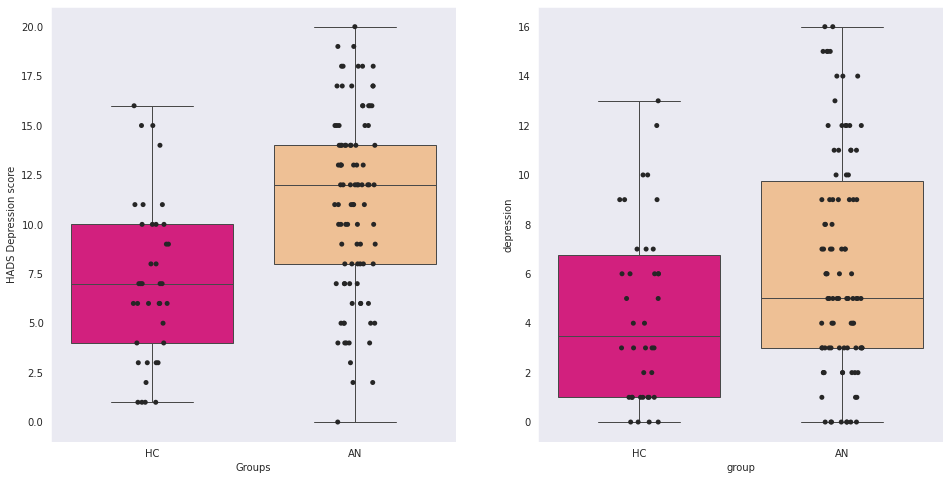

In [8]:
fig,ax = plt.subplots(1,2, figsize=(16,8))
sns.boxplot(x='group', y='anxiety', data=hads_df, ax=ax[0], linewidth=1, palette='Accent_r')
sns.stripplot(ax=ax[0], x="group", y="anxiety", data=hads_df, color=".15")
ax[0].set(xlabel='Groups', ylabel='HADS Anxiety score')

sns.boxplot(x='group', y='depression', data=hads_df, ax=ax[1], linewidth=1, palette='Accent_r')
sns.stripplot(ax=ax[1], x="group", y="depression", data=hads_df, color=".15")
ax[0].set(xlabel='Groups', ylabel='HADS Depression score')

[Text(0.5, 0, 'Groups'), Text(0, 0.5, 'BMI')]

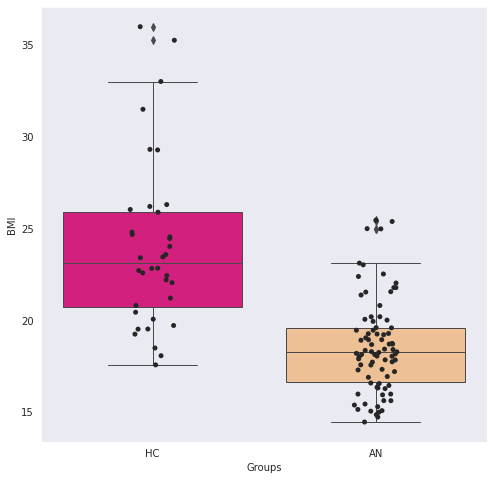

In [9]:
fig,ax = plt.subplots(1,1, figsize=(8,8))
sns.boxplot(x='group', y='bmi', data=bmi_df, linewidth=1, palette='Accent_r')
sns.stripplot(x="group", y="bmi", data=bmi_df, color=".15")
ax.set(xlabel='Groups', ylabel='BMI')

[Text(0.5, 0, 'Groups'), Text(0, 0.5, 'OCI score')]

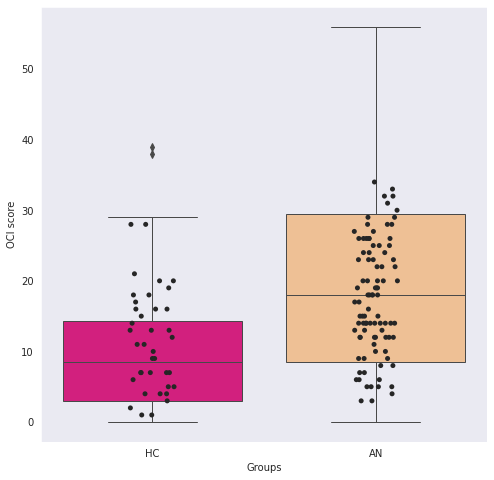

In [10]:
fig,ax = plt.subplots(1,1, figsize=(8,8))
sns.boxplot(x='group', y='overall_score', data=oci_df, linewidth=1, palette='Accent_r')
sns.stripplot(x="group", y="overall_score", data=hads_df, color=".15")
ax.set(xlabel='Groups', ylabel='OCI score')

[Text(0.5, 0, 'Groups'), Text(0, 0.5, 'WSAS score')]

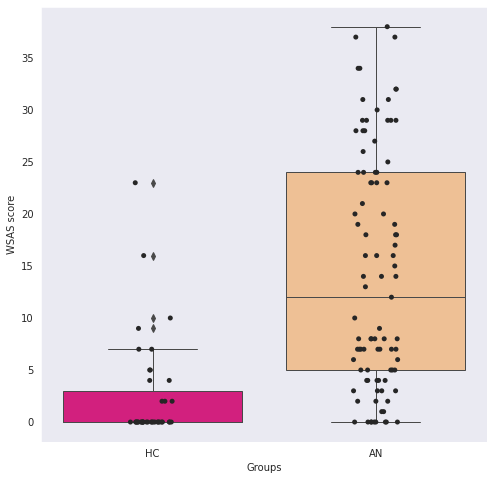

In [11]:
fig,ax = plt.subplots(1,1, figsize=(8,8))
sns.boxplot(x='group', y='overall_score', data=wsas_df, linewidth=1, palette='Accent_r')
sns.stripplot(x="group", y="overall_score", data=wsas_df, color=".15")
ax.set(xlabel='Groups', ylabel='WSAS score')

[Text(0.5, 0, 'Groups'), Text(0, 0.5, 'global_score')]

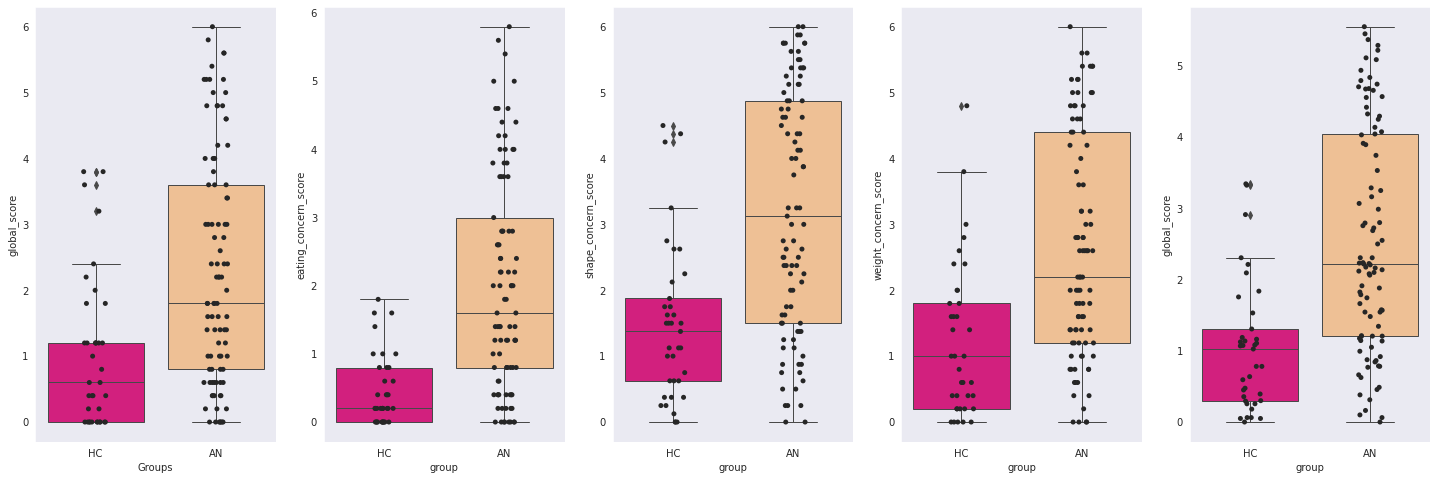

In [18]:
fig,ax = plt.subplots(1,5, figsize=(25,8))

sns.boxplot(x='group', y='restraint_score', data=edeq_df, ax=ax[0], linewidth=1, palette='Accent_r')
sns.stripplot(ax=ax[0], x="group", y="restraint_score", data=edeq_df, color=".15")
ax[0].set(xlabel='Groups', ylabel='restraint_score')

sns.boxplot(x='group', y='eating_concern_score', data=edeq_df, ax=ax[1], linewidth=1, palette='Accent_r')
sns.stripplot(ax=ax[1], x="group", y="eating_concern_score", data=edeq_df, color=".15")
ax[0].set(xlabel='Groups', ylabel='eating_concern_score')

sns.boxplot(x='group', y='shape_concern_score', data=edeq_df, ax=ax[2], linewidth=1, palette='Accent_r')
sns.stripplot(ax=ax[2], x="group", y="shape_concern_score", data=edeq_df, color=".15")
ax[0].set(xlabel='Groups', ylabel='shape_concern_score')

sns.boxplot(x='group', y='weight_concern_score', data=edeq_df, ax=ax[3], linewidth=1, palette='Accent_r')
sns.stripplot(ax=ax[3], x="group", y="weight_concern_score", data=edeq_df, color=".15")
ax[0].set(xlabel='Groups', ylabel='weight_concern_score')

sns.boxplot(x='group', y='global_score', data=edeq_df, ax=ax[4], linewidth=1, palette='Accent_r')
sns.stripplot(ax=ax[4], x="group", y="global_score", data=edeq_df, color=".15")
ax[0].set(xlabel='Groups', ylabel='global_score')